Acurácia do modelo LDA: 1.0000


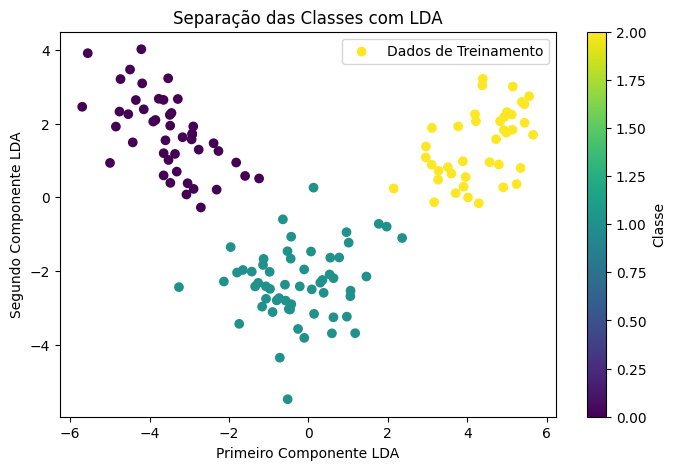


Coeficientes de LDA (Importância das variáveis):
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  2.118216   -0.320832  1.711271          -3.086714  -0.029985   
1 -1.349052   -0.915893 -1.561786           1.296843   0.041360   
2 -0.460594    1.666083  0.300365           1.624552  -0.025204   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0      -1.486748    5.078714              0.425308        -0.452818   
1      -0.115739    1.118910              0.446910         0.564865   
2       1.837519   -7.308000             -1.115318        -0.295512   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0        -2.021271  0.013783                      3.042440  4.273134  
1        -1.622422  0.638206                      0.382285 -1.788246  
2         4.585881 -0.924950                     -3.967501 -2.259024  


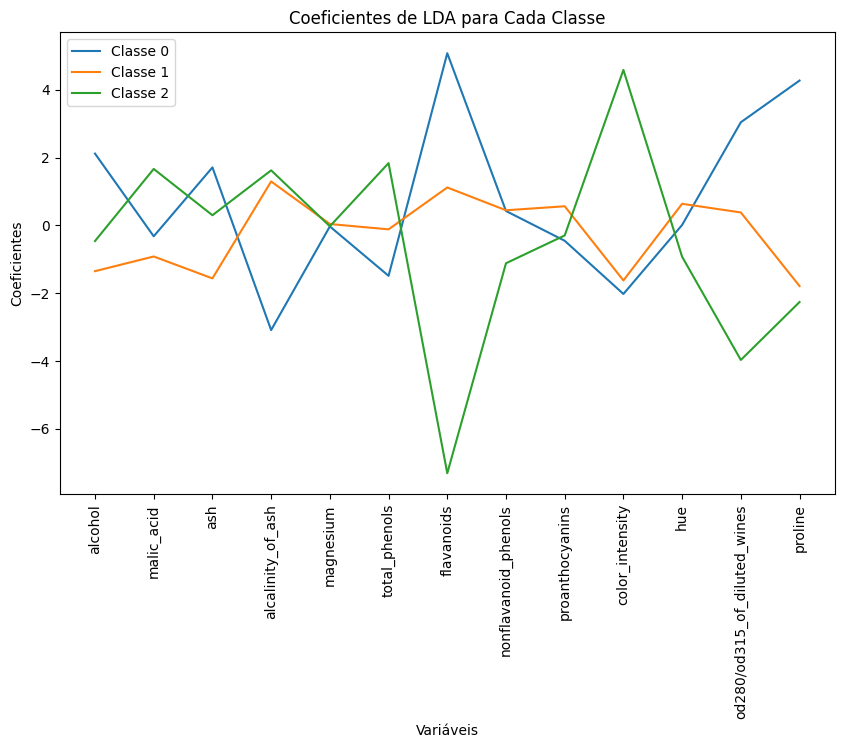

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Carregar o conjunto de dados Wine
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar LDA (Linear Discriminant Analysis)
lda = LinearDiscriminantAnalysis(n_components=2)  # Reduzir para 2 componentes principais para visualização
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

# Avaliar o desempenho do LDA
y_pred_lda = lda.predict(X_test_scaled)
lda_accuracy = accuracy_score(y_test, y_pred_lda)
print(f"Acurácia do modelo LDA: {lda_accuracy:.4f}")

# Visualizar a separação das classes
plt.figure(figsize=(8, 5))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', label='Dados de Treinamento')
plt.title("Separação das Classes com LDA")
plt.xlabel("Primeiro Componente LDA")
plt.ylabel("Segundo Componente LDA")
plt.colorbar(label='Classe')
plt.legend(loc='best')
plt.show()

# Analisar os coeficientes de LDA (importância das variáveis)
coefficients_df = pd.DataFrame(lda.coef_, columns=feature_names)
print("\nCoeficientes de LDA (Importância das variáveis):")
print(coefficients_df)

# Plotando a importância das variáveis com base nos coeficientes de LDA
plt.figure(figsize=(10, 6))
for i in range(coefficients_df.shape[0]):
    plt.plot(coefficients_df.columns, coefficients_df.iloc[i, :], label=f"Classe {i}")
plt.title("Coeficientes de LDA para Cada Classe")
plt.xlabel("Variáveis")
plt.ylabel("Coeficientes")
plt.legend(loc="best")
plt.xticks(rotation=90)
plt.show()
